In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 35.2 MB/s  0:00:02m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [catboost]1/2 [catboost]


In [61]:
from catboost import CatBoostClassifier, Pool
import pandas as pd
# from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [102]:
# Training Data (CC undersampling)===Testing Data (CC undersampling)
train_df = pd.read_csv(".././Training-Testing Dataset/Training Data (RWS Oversampling).csv")
test_df = pd.read_csv(".././Training-Testing Dataset/Testing Data (RWS Oversampling).csv")
# test_df = pd.read_csv(".././Training-Testing Dataset/Testing Data (CC undersampling).csv")

X_train = train_df.drop(columns=["target"])
Y_train = train_df["target"]
X_test = test_df.drop(columns=["target"])
Y_test = test_df["target"]


print(Y_train.value_counts())


target
Medium_No     4940
High_No       4219
Low_No        3872
Medium_Yes    3347
High_Yes      3266
Low_Yes       3220
Name: count, dtype: int64


In [103]:
categorical_features = [col for col in X_train.columns if X_train[col].dtype == 'object' or X_train[col].dtype == 'category']

for col in categorical_features:
    X_train[col] = X_train[col].astype(str)

    X_test[col] = X_test[col].astype(str)

# Y_train["target"] = Y_train["target"].astype(str)
# Y_test["target"] = Y_test["target"].astype(str)

train_pool = Pool(X_train,Y_train,cat_features=categorical_features)
test_pool = Pool(X_test,Y_test,cat_features=categorical_features)

In [ ]:
model = CatBoostClassifier(
    iterations=2000,
    depth=6,
    learning_rate=0.05,
    l2_leaf_reg=5,
    loss_function="MultiClass",
    eval_metric="Accuracy",
    early_stopping_rounds=100,
    verbose=100,
    random_state=42
)

model.fit(train_pool,eval_set=test_pool)

y_pred = model.predict(X_test)

print("Accuracy rate ", accuracy_score(Y_test,y_pred)*100)

0:	learn: 0.2776417	test: 0.2973919	best: 0.2973919 (0)	total: 275ms	remaining: 9m 9s
100:	learn: 0.4655353	test: 0.5067854	best: 0.5069975 (97)	total: 16s	remaining: 5m 1s
200:	learn: 0.5183695	test: 0.5745335	best: 0.5779792 (193)	total: 28.4s	remaining: 4m 14s
300:	learn: 0.5913226	test: 0.6519826	best: 0.6536260 (295)	total: 42.1s	remaining: 3m 57s
400:	learn: 0.6176085	test: 0.6787002	best: 0.6800785 (398)	total: 56.1s	remaining: 3m 43s
500:	learn: 0.6365028	test: 0.6956637	best: 0.6966709 (496)	total: 1m 9s	remaining: 3m 27s
600:	learn: 0.6527729	test: 0.7141115	best: 0.7142176 (597)	total: 1m 22s	remaining: 3m 12s
700:	learn: 0.6714048	test: 0.7300148	best: 0.7300148 (700)	total: 1m 35s	remaining: 2m 57s
800:	learn: 0.6843509	test: 0.7452290	best: 0.7452290 (800)	total: 1m 49s	remaining: 2m 43s
900:	learn: 0.6958537	test: 0.7539228	best: 0.7541349 (896)	total: 2m 2s	remaining: 2m 29s
1000:	learn: 0.7071816	test: 0.7677587	best: 0.7677587 (1000)	total: 2m 16s	remaining: 2m 16s
11

In [ ]:
model.load_model("catboost_marriage_model.cbm")

In [105]:
test_df_cc = pd.read_csv(".././Training-Testing Dataset/Training Data (CC undersampling).csv")

X_test_cc = train_df.drop(columns=["target"])
Y_test_cc = train_df["target"]


for col in categorical_features:
    X_test_cc[col] = X_test_cc[col].astype(str)

test_pool = Pool(X_test_cc,Y_test_cc,cat_features=categorical_features)

In [106]:
y_pred = model.predict(X_test_cc)

print("Accuracy rate ", accuracy_score(Y_test_cc,y_pred)*100)

Accuracy rate  72.41952414275717


        Feature Id  Importances
0  Age_at_Marriage    20.914542
1  Education_Level    15.397329
2         Religion    12.698403
3     Income_Level    11.485378
4   Spouse_Working     7.820306
5           Gender     7.560841
6      Urban_Rural     7.531828
7      Inter-Caste     6.078591
8      Caste_Match     5.916361
9   Inter-Religion     4.596421


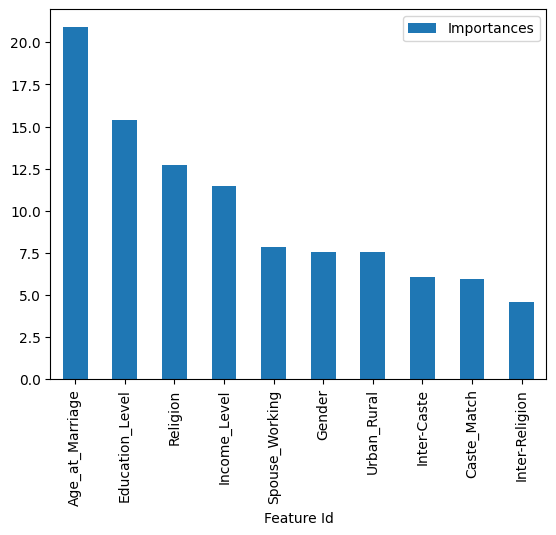

In [107]:
feat_imp = model.get_feature_importance(prettified=True)
print(feat_imp)
feat_imp.plot(kind='bar', x='Feature Id', y='Importances')
plt.show()
